# Pricing Predicition Analysis of New York City’s Airbnb Data

### STANDARD IMPORT 

In [1]:
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
/Users/prashantsingh/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
Image(url='https://img4.cityrealty.com/neo/i/p/mig/airbnb_guide.jpg')

Airbnb has seen a meteoric growth since its inception in 2008 with the number of rentals listed on its
website growing exponentially each year. Airbnb has successfully disrupted the traditional hospitality
industry as more and more travellers, not just the ones who are looking for a bang for their buck but
also business travellers resort to Airbnb as their premier accommodation provider. New York City has
been one of the hottest markets for Airbnb, with over 52,000 listings as of November 2018. This
means there are over 40 homes being rented out per square km. in NYC on Airbnb! One can perhaps
attribute the success of Airbnb in NYC to the high rates charged by the hotels, which are primarily
driven by the exorbitant rental prices in the city.

## 1. Loading Data

In [3]:
#Load the Dataset
NY_data = pd.read_csv('/Users/prashantsingh/Desktop/AB_NYC/AB_NYC_2019.csv')

In [4]:
#No. of rows and columns in dataset.
print("Total number of rows :",NY_data.shape[0])
print("Total number of columns:",NY_data.shape[1])

Total number of rows : 48895
Total number of columns: 16


In [5]:
#Airbnb Summary Statistic.
NY_data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
#check the data types and check if any columns are of different data types that you would expect
#check the missing values for every column
NY_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
#View the top 5 datatsets.
NY_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
NY_data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [9]:
NY_data.index

RangeIndex(start=0, stop=48895, step=1)

## 2.Clean- Missing values

In [10]:
res = NY_data.isnull().sum(axis=0)/NY_data.shape[0]        
res
#Note: isnull() function detect missing values in the given series object. 
     #It return a boolean same-sized object indicating if the values are NA. 
    #Missing values gets mapped to True and non-missing value gets mapped to False

id                                0.000000
name                              0.000327
host_id                           0.000000
host_name                         0.000429
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.205583
reviews_per_month                 0.205583
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

From above info NY_data DataFrame 'name','host_name','last_review','reviews_per_month' are four features have missing values.

In [11]:
#filling the "reviews_per_month & last_review" with 0 value.
#filling the "name & host_name" column with NA value.
NY_data['reviews_per_month'].fillna(0,inplace=True)
NY_data['name'].fillna('NA',inplace=True)
NY_data['last_review'].fillna(0,inplace=True)
NY_data['host_name'].fillna('NA',inplace=True)

In [12]:
NY_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [13]:
NY_data.to_csv("cleanning.csv", index=False)

In [14]:
# Droping the column "id" and "host_id" becasue I will not use in my analysis and create the Clean dataframe.
df = NY_data.drop(['id','host_id'], axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48895 non-null  object 
 1   host_name                       48895 non-null  object 
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  last_review                     48895 non-null  object 
 11  reviews_per_month               48895 non-null  float64
 12  calculated_host_listings_count  

In [16]:
#View the top 5 data in dataset.
df.head(5)

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [17]:
#Categorical variable
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

Shared room less occupies compare to Entire home/apt & Private room

In [18]:
df['room_type'].value_counts(normalize=True)

Entire home/apt    0.519665
Private room       0.456611
Shared room        0.023724
Name: room_type, dtype: float64

In [19]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

## 3.Identifying outliers

In [20]:
df.head()

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [21]:
#Droping the columns to identifying the outlier and using IQR.
drop_cols = list(df.select_dtypes(['O']).columns)+['latitude', 'longitude', 'minimum_nights']
drop_cols

['name',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'room_type',
 'last_review',
 'latitude',
 'longitude',
 'minimum_nights']

In [22]:
df.drop(drop_cols, axis=1, inplace=True)

In [23]:
df.head()

,price,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,149,9,0.21,6,365
1,225,45,0.38,2,355
2,150,0,0.00,1,365
3,89,270,4.64,1,194
4,80,9,0.10,1,0


In [24]:
#Ensure all columns in float64 format
df=df.astype(np.float64)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           48895 non-null  float64
 1   number_of_reviews               48895 non-null  float64
 2   reviews_per_month               48895 non-null  float64
 3   calculated_host_listings_count  48895 non-null  float64
 4   availability_365                48895 non-null  float64
dtypes: float64(5)
memory usage: 1.9 MB


In [26]:
#Check if each value of mySeries lies within the outlier range.
#If the value is greater than upperOutlier mark it True
#If the value is lower than lowerOutlier mark it True
#return the total number of outliers for that series.
def numberOfOutliers(mySeries, upperOutlier, lowerOutlier):
    return sum((mySeries > upperOutlier.loc[mySeries.name, ]) | (mySeries < lowerOutlier.loc[mySeries.name,]))

def outlier_stats(df):
    numericDescribe = (df.describe(include='all').T).round(decimals=3)
    
    # Calculate outliers using this formula: first quartile – 1.5·IQR > outlier > third quartile + 1.5·IQR
    numericDescribe['IQR'] = numericDescribe['75%'] - numericDescribe['25%']
    numericDescribe['outliers'] = (numericDescribe['max'] > (numericDescribe['75%'] + (1.5 * numericDescribe['IQR']))) \
                            | (numericDescribe['min'] < (numericDescribe['25%'] - (1.5 * numericDescribe['IQR'])))
    
    # Calculate IQR for each column of the dataframe.
    IQR = df.quantile(.75) - df.quantile(.25)
    
    # Calculate the upper and lower outlier values
    upperOutlier = df.quantile(.75) + (1.5 * (IQR))
    lowerOutlier = df.quantile(.25) - (1.5 * (IQR))
    
    # Store the result in a new column
    numericDescribe['num_outliers'] = df.apply(numberOfOutliers, args=(upperOutlier, lowerOutlier))
    numericDescribe.sort_values('num_outliers', ascending=False, inplace=True)
    newColOrder = ['count', 'outliers', 'num_outliers', 'IQR', 'mean', 'std', \
               'min', '25%', '50%', '75%', 'max']
    numericDescribe = numericDescribe.reindex(columns=newColOrder)
    
    return numericDescribe


In [27]:
outlier_stats_df = outlier_stats(df)
outlier_stats_df

,count,outliers,num_outliers,IQR,mean,std,min,25%,50%,75%,max
calculated_host_listings_count,48895.0,True,7081,1.00,7.144,32.953,1.0,1.00,1.00,2.00,327.0
number_of_reviews,48895.0,True,6021,23.00,23.274,44.551,0.0,1.00,5.00,24.00,629.0
reviews_per_month,48895.0,True,3312,1.54,1.091,1.597,0.0,0.04,0.37,1.58,58.5
price,48895.0,True,2972,106.00,152.721,240.154,0.0,69.00,106.00,175.00,10000.0
availability_365,48895.0,False,0,227.00,112.781,131.622,0.0,0.00,45.00,227.00,365.0


Most of the customers travel in New york in different neighbourhood groups in different time zones, hence price,number of reviews and host_listing_counts observation will significantly change and differ. Therefore if we change the lower and Upper outlier value from 1.5 to 4.5 still 4 features variables treated as Outlier.

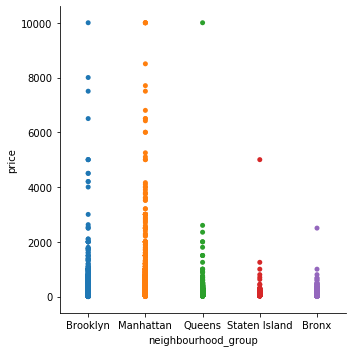

In [28]:
#Examing the outlier using the scatter plot.
sns.catplot(x="neighbourhood_group", y="price", jitter = False ,data=NY_data);

As per above scatter plot using catplot() method , we see 'neighbourhood_group' and 'price' of different neighbourhood_group are distant from all other observation.

In [29]:
df.to_csv("Data_Wrangling.csv",index=False)